In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller 

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark")  

In [ ]:
# Download and get the stock price data 

#!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

In [3]:
df = pd.read_csv('sp500sub.csv', index_col=0, parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [5]:
goog = df[df.Name == 'GOOG'][['Close']]

goog['LogReturn'] = np.log(goog['Close']).diff()

goog.head()

,Close,LogReturn
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


<Axes: xlabel='Date'>

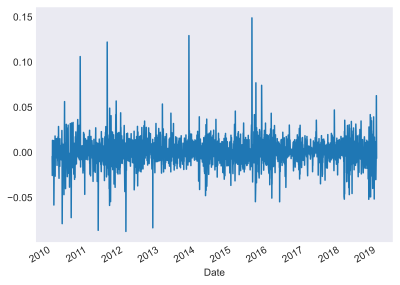

In [12]:
goog['LogReturn'].plot()

In [13]:
# Check if log returns are stationary 

# Helper function to decide if the series is stationary or not!

def adf(x): # Note that the null hypothesis is that the TS is non-stationary

    test, p_val, *_ = adfuller(x)

    print(f"ADF test statistic: {test:.4f}")
    print(f"ADF p-value: {p_val:.4f}")

    if p_val < 0.05:
        print('Time-series is stationary!')
    else:
        print('Time-series is not stationary!')

adf(goog['LogReturn'].dropna())

ADF test statistic: -46.6675
ADF p-value: 0.0000
Time-series is stationary!


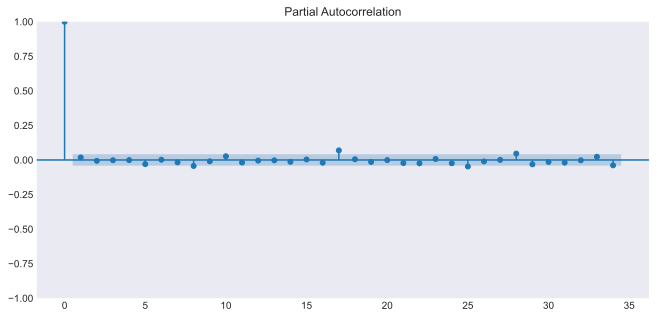

In [6]:
fig, axes = plt.subplots(figsize = (11,5))

plot_pacf(goog['LogReturn'].dropna(), ax = axes);

No autocorrelation beyond 0 lag. According to the PACF, we would choose $p = 0$. 

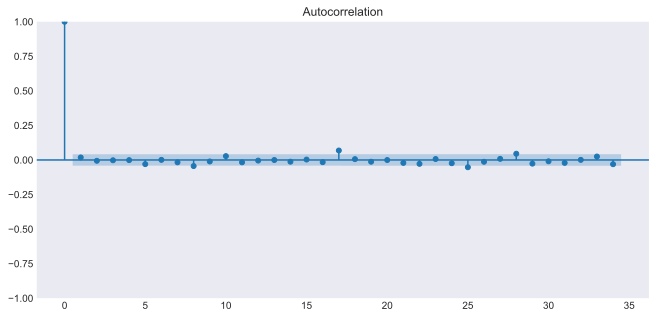

In [7]:
fig, axes = plt.subplots(figsize = (11,5))

plot_acf(goog['LogReturn'].dropna(), ax = axes);

We would choose $q = 0$ according to ACF. Therefore according to the ACF and PACF, we would adopt a (0,1,0) model which is a random walk! 

In [15]:
# Apple Stock 

aapl = df[df.Name == 'AAPL'][['Close']]

aapl['LogReturn'] = np.log(aapl['Close']).diff()

aapl.head()

,Close,LogReturn
Date,,
2010-01-04,30.572857,NaN
2010-01-05,30.625713,0.001727
2010-01-06,30.138571,-0.016034
2010-01-07,30.082857,-0.001850
2010-01-08,30.282858,0.006626


In [16]:

adf(aapl['LogReturn'].dropna())

ADF test statistic: -13.1230
ADF p-value: 0.0000
Time-series is stationary!


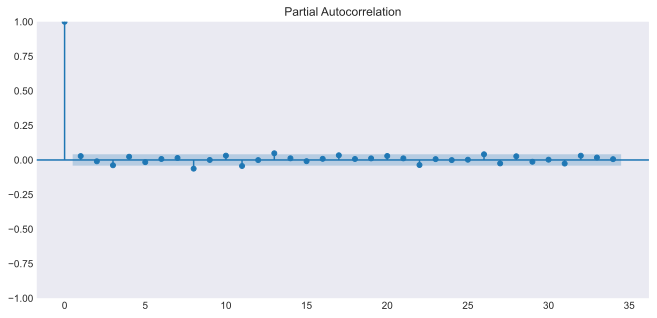

In [17]:
fig, axes = plt.subplots(figsize = (11,5))

plot_pacf(aapl['LogReturn'].dropna(), ax = axes);

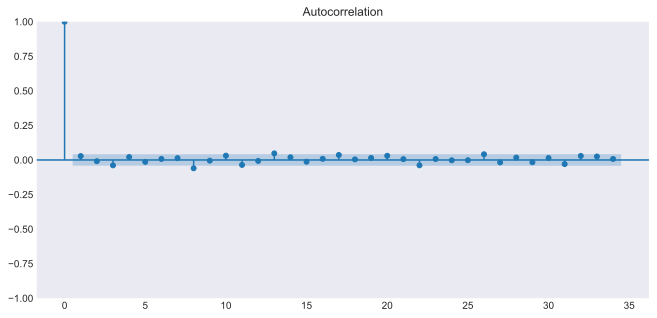

In [18]:
fig, axes = plt.subplots(figsize = (11,5))

plot_acf(aapl['LogReturn'].dropna(), ax = axes);